### A gaussian integral  

Using Monte Carlo integration, check that
$$ 
\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \, dx = 2\sigma^4 
$$
Does the result converge with the number of samples? And how does the error go down? Do it many time.  
For a give*n* N, how are the result distributed? Try to fit it by hand with a parametrized model (I*f* N is large enough you should get something that looks very accurate! And if is small?). 

How does the distribution change i*f* N increases?

To apply the Monte Carlo rule we need to rewrite the integral as
$$
I =\int f(x)p(x)dx
$$
where $$ \int p(x) dx = 1 $$ so that $$ I \approx \frac{1}{N}\sum_{i=1}^{N}f(x_i)$$
In this case we recognize that we have half of a gaussian. For a gaussian pdf with mean=0 we have that:
$$ \int_{-\infty}^\infty \frac{1}{\sqrt(2\pi\sigma^2)} e^{\frac{-x^2}{\sigma^2}}dx = 1 $$
So if we multiply and divide by $$\sqrt\frac{\pi\sigma^2}{2} $$ 
we can apply our rule with
$$ p(x) = \sqrt\frac{2}{\pi\sigma^2}e^{\frac{-x^2}{\sigma^2}}$$ 
and 
$$ f(x) = x^3 $$

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [37]:
#Set the standard deviation and N
sigma = 0.5
N = 10000

#Generate random numbers that follow a gaussian distribution but I take only positive numbers with the absolute value
xi = abs(np.random.normal(0, sigma, N))

# Definition f(x)
def f(x, s):
    return x**3
    
#I apply Monte Carlo rule   
integral = sigma* np.sqrt(2*np.pi)*np.mean(f(xi, sigma)/2)

print("Valore trovato con metodo Monte Carlo: "+ str(integral)+ ", Errore: " + str(sigma/np.sqrt(N)) + ", Valore tabulato: "+ str(2*sigma**4))

Valore trovato con metodo Monte Carlo: 0.12638983544582966, Errore: 0.005, Valore tabulato: 0.125


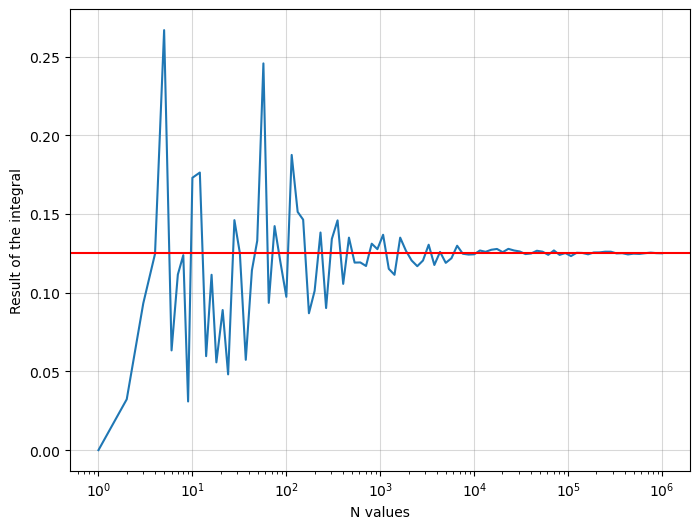

In [38]:
#What happens if N changes?    
n = np.unique(np.logspace(0,6,100,dtype=int))
integrals=[]

#I do the integration many times with different N
for i in range(0, len(n)):
    x = abs(np.random.normal(0, sigma, n[i]))
    integrals.append(sigma* np.sqrt(2*np.pi)*np.mean(f(x, sigma)/2))

#Plot 
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.gca()
ax1.plot(n, integrals)
ax1.axhline(y = 2*sigma**4, color='red', label='True value')
ax1.set_xlabel("N values")
ax1.set_ylabel("Result of the integral")
ax1.legend
ax1.grid(c='grey', alpha = 0.3)
ax1.set_xscale('log')

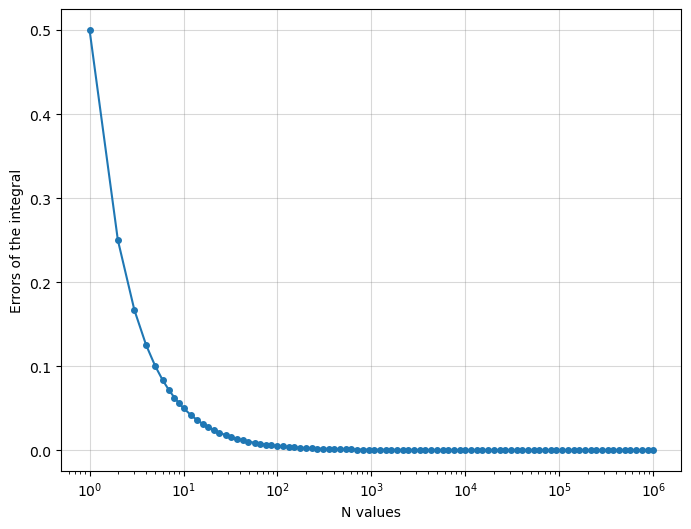

In [39]:
#Now we want to study how the error changes
errors= sigma/n

#Plot errors vs N values 
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.gca()
ax2.plot(n, errors, marker = 'o', ms = 4)
ax2.set_xlabel("N values")
ax2.set_ylabel("Errors of the integral")
ax2.set_xscale('log')
ax2.grid(c='grey', alpha = 0.3)

As *N* increases, the error tends to zero because the result of the Monte Carlo integral tends to the true results 

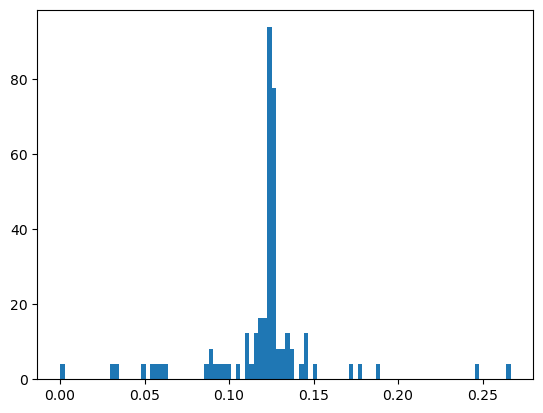

In [41]:
#We can also check if it looks like a gaussian 

#evaluate the mean and std from the results
mean = np.average(integrals)
std = np.std(integrals, ddof=1)

#Plot 
plt.hist(integrals, density=True, bins=100)
gauss = scipy.stats.norm(loc=mean, scale=std)
#x = np.linspace(0 ,0.25, 1000)
#plt.plot(x, gauss.pdf(x))